Github link: https://github.com/smashingzing/lab4

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram

# Q1

In [30]:
labs=pd.read_csv('NCI60_labs.csv')
data=pd.read_csv('NCI60_data.csv')

In [32]:
data=data.drop(['Unnamed: 0'], axis=1)

In [20]:
y=labs['x']

In [40]:
y1=labs['Unnamed: 0']

# Q2

In [10]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)
# performing pca
pca = PCA()
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

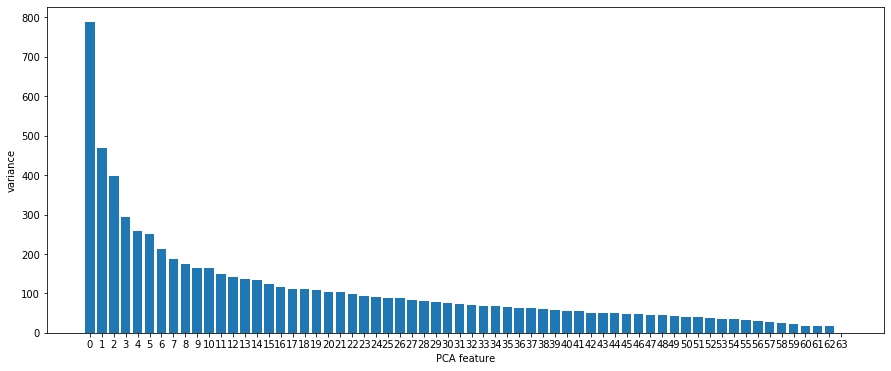

In [14]:
# Plot the explained variances
features = range(pca.n_components_)
fig = plt.figure(figsize = (15,6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

63 PCs are produced in the analysis. 

# Q3

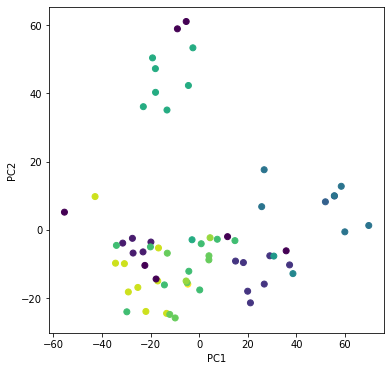

In [22]:
# Scatter plot
pca_features = pca.fit_transform(data_scaled)
LE = LabelEncoder()
fig = plt.figure(figsize = (6,6))
plt.scatter(pca_features[:,0], pca_features[:,1], c = LE.fit_transform(y)) 
plt.xlabel('PC1') 
plt.ylabel('PC2')
plt.show()

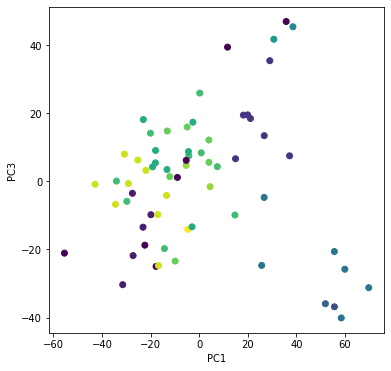

In [23]:
# Scatter plot
pca_features = pca.fit_transform(data_scaled)
LE = LabelEncoder()
fig = plt.figure(figsize = (6,6))
plt.scatter(pca_features[:,0], pca_features[:,2], c = LE.fit_transform(y)) 
plt.xlabel('PC1') 
plt.ylabel('PC3')
plt.show()

# Q4

<function matplotlib.pyplot.show(*args, **kw)>

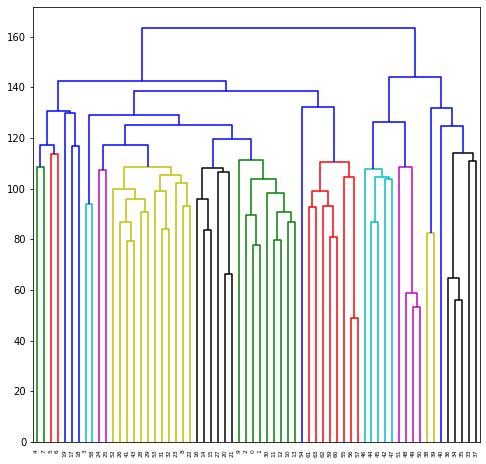

In [60]:
# Plot the dendrogram
fig = plt.figure(figsize = (8,8))
Z = linkage(data_scaled, method='complete')
dendrogram(Z)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

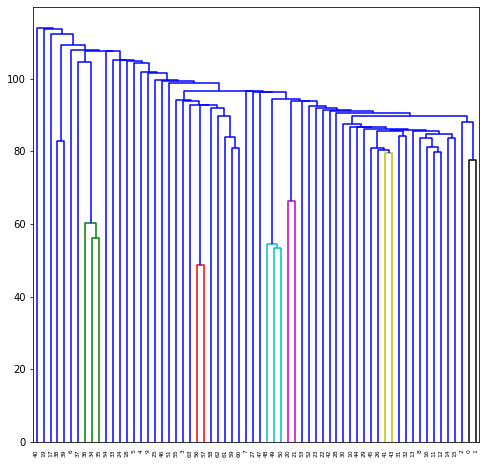

In [61]:
# Plot the dendrogram
fig = plt.figure(figsize = (8,8))
Z = linkage(data_scaled, method='single')
dendrogram(Z)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

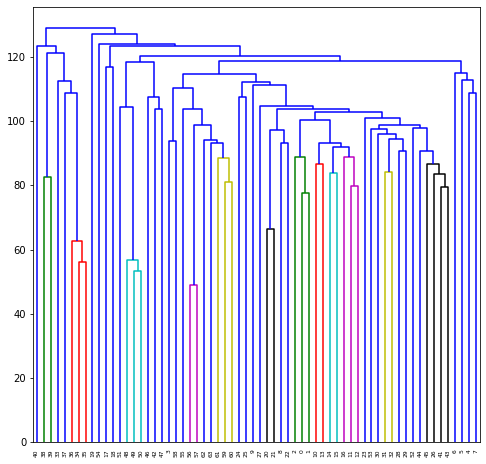

In [62]:
# Plot the dendrogram
fig = plt.figure(figsize = (8,8))
Z = linkage(data_scaled, method='average')
dendrogram(Z)
plt.show

The choice of linkage impact the results

# Q5

<function matplotlib.pyplot.show(*args, **kw)>

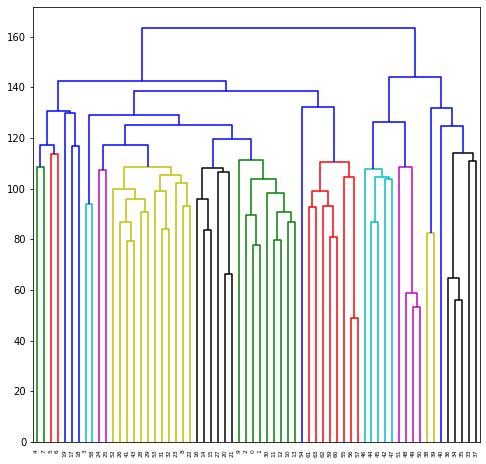

In [63]:
# Plot the dendrogram
fig = plt.figure(figsize = (8,8))
Z = linkage(data_scaled, method='complete')
dendrogram(Z)
plt.show

# Q6

In [45]:
pca = PCA(n_components=5)
pca_features = pca.fit_transform(data_scaled)

<function matplotlib.pyplot.show(*args, **kw)>

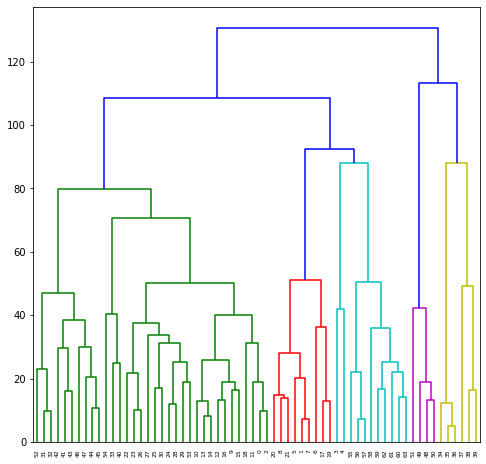

In [64]:
# Plot the dendrogram
fig = plt.figure(figsize = (8,8))
Z = linkage(pca_features, method='complete')
dendrogram(Z)
plt.show

In [66]:
# Use fcluster to extract labels: labels
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings,6,criterion='distance')

In [67]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  BREAST  CNS  COLON  K562A-repro  K562B-repro  LEUKEMIA  \
labels                                                              
1               0    0      0            0            0         0   
2               0    0      0            0            0         0   
3               0    0      0            0            0         0   
4               0    0      1            0            0         0   
5               0    0      1            0            0         0   
...           ...  ...    ...          ...          ...       ...   
59              0    0      0            1            0         1   
60              0    0      0            0            1         0   
61              0    0      0            0            0         1   
62              0    0      0            0            0         1   
63              0    0      0            0            0         1   

varieties  MCF7A-repro  MCF7D-repro  MELANOMA  NSCLC  OVARIAN  PROSTATE  \
labels                     